#  **Titanic Classification:**

#### **By: [Abdessamad Touzani](https://www.linkedin.com/in/abdessamadtouzani/)**

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#cleandata">Data Wrangling</a></li>
        <li><a href="#exploredata">Data Explortion</a></li>
        <li><a href="#modeling">Modeling (Logistic Regression with Scikit-learn)</a></li>
        <li><a href="#evaluation">Evaluation (Scikit-learn metrics)</a></li>
    </ol>
</div>
<br>
<hr>


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
#read data
df = pd.read_csv("titanic.csv")
#display head of data to make sure it was read 
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2 id='cleandata'><b>Data Wrangling:</b></h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df.duplicated().sum()

0

*No duplicated values*

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

For this project, cabin will not really serves at anything, so I will just drop that column

In [6]:
df.drop(columns='Cabin', axis=1, inplace=True)
#Dropped successfully?
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


For the age, it's a continuous attribute, so I will replace the null values with the mean

In [7]:
age_mean = df['Age'].mean()
df['Age'].replace(np.NaN, age_mean, inplace=True)


For embarked, it's a categorical attribute, so I will replace the NULL values with he most frequent value

In [8]:
embarked_freq = df['Embarked'].mode()[0]
df['Embarked'].replace(np.NaN, embarked_freq, inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

As we see, we have no null values left.
Now, one last step, I will convert age's type to int

In [10]:
df['Age'] = df['Age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [11]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


<h2 id='exploredata'><b>Data Exploration:</b></h2>

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


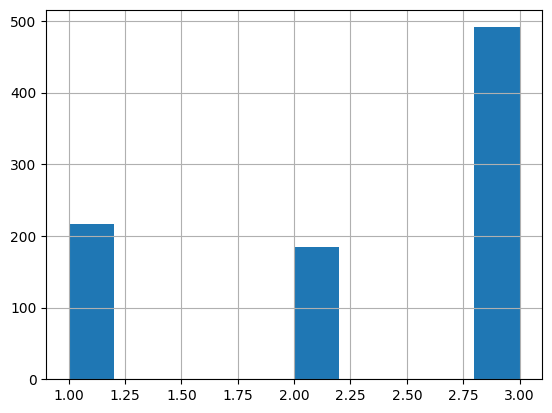

In [14]:
#Passengers by class
viz = df['Pclass']
viz.hist()
plt.show()

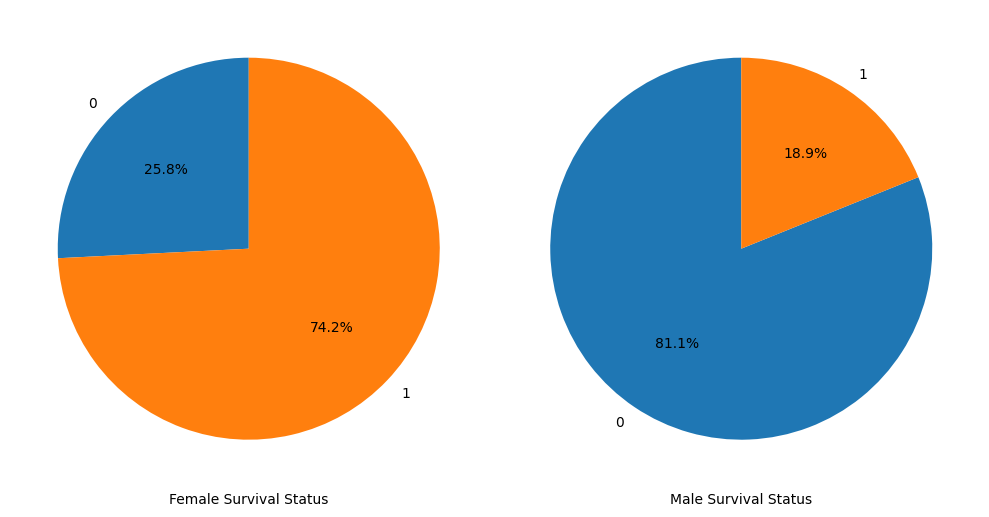

In [15]:

#Survival by sex
survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
for i, (sex, counts) in enumerate(survival_counts.iterrows()):
    ax=axes[i]
    counts.plot(kind='pie', 
                ax=ax, 
                autopct='%1.1f%%',
                startangle=90)
    ax.set_ylabel('')
    ax.set_xlabel(sex.capitalize()+' Survival Status')
plt.tight_layout() #prevent overlapping
plt.show()


<h2 id='modeling'><b>Modeling: (Linear Regression)<b></h2>

### **Algorithm Selection:**

In this project, we will try to predict if a person can survive the disaster or no, so for that we will be using **Logistic Regression** as an algorithm for this problem.

In [16]:
#Replace sex and Embarked colmns (0, 1...) for modeling
df.replace({'Sex':{'male':0, 'female':1}, 
            'Embarked':{'S':0, 'C':1, 'Q':2}
            }, inplace=True)
#check
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.25,0


### **Define Predictors's variables and the target:**

In [17]:
#Independent variables - Predictors
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
#Target variable
y = df['Survived']

### **Train/Test dataset:**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#visualize Shape of Train/Test datset
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (712, 7) (712,)
Test set:  (179, 7) (179,)


In [19]:
#choosing liblinear as solver
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, solver='liblinear')

<h2 id='evaluation'><b>Evalution: (Scikit-learn metrics)<b></h2>

In [20]:
from sklearn.metrics import brier_score_loss

#Test predictions
yhat = LR.predict(X_test)
#Predict Proba
yhat_prob = LR.predict_proba(X_test)

#Evalution metrics

'''To evaluate the quality of these probabilities 
and themodel's calibration'''

brier_score = brier_score_loss(y_test, yhat_prob[:, 1])  # The probability of the positive class
print("Brier Score:", brier_score)

Brier Score: 0.20226138717734712


*Brier score of 0.202 suggests that the model's predicted probabilities are relatively close to the actual outcomes, indicating reasonable calibration.*

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score


#Evaluation Metrics:

accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
f1score = f1_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)

#Output

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("Jaccard Index:", jaccard)

Accuracy: 0.6536312849162011
Precision: 0.8148148148148148
Recall: 0.27848101265822783
F1 Score: 0.4150943396226415
Jaccard Index: 0.2619047619047619


*Precision is relatively high, indicating that the model is good at correctly indentify survivors when it predicts survival, but in other hand, recall is low, which means the model misses a significant portion of actual survivors.
We can conclude that we have an imbalance, this might be due the threshold for classification...Let's try to adjust it...*

In [22]:
#define a threshold value
threshold = 0.4

yhat_adjusted_threshold = (yhat_prob[:, 1] >= threshold).astype(int)

#Calculate evaluation metrics with the adjusted threshold
accuracy_adjusted = accuracy_score(y_test, yhat_adjusted_threshold)
precision_adjusted = precision_score(y_test, yhat_adjusted_threshold)
recall_adjusted = recall_score(y_test, yhat_adjusted_threshold)
f1score_adjusted = f1_score(y_test, yhat_adjusted_threshold)
jaccard_adjusted = jaccard_score(y_test, yhat_adjusted_threshold)

#Output

print("Adjusted Threshold Evaluation Metrics:")
print("Accuracy:", accuracy_adjusted)
print("Precision:", precision_adjusted)
print("Recall:", recall_adjusted)
print("F1 Score:", f1score_adjusted)
print("Jaccard Index:", jaccard_adjusted)


Adjusted Threshold Evaluation Metrics:
Accuracy: 0.7486033519553073
Precision: 0.8148148148148148
Recall: 0.5569620253164557
F1 Score: 0.6616541353383458
Jaccard Index: 0.4943820224719101


*Adjusting the threshold has improved some of the evaluation metrics, particularly recall and F1 score, while maintaining precision at the same level.
The model's performance has been enhanced in correctly identifying survivors while maintaining precision. This adjustment can be beneficial for achieving a better balance between precision and recall according*

#### **By: [Abdessamad Touzani](https://www.linkedin.com/in/abdessamadtouzani/)**